<a href="https://colab.research.google.com/github/gowravmannem/HackAi_2024/blob/main/lazypredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install lazypredict

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [4]:
dummies = pd.get_dummies(df.furnishingstatus)

# Concatenate the dummies to original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the values
df_new = merged.drop(columns=['furnishingstatus'])

# print the dataframe
df_new

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [5]:
# taking out Area data outliers
df1 = df_new.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = ["area"]

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
529,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
530,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
531,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [6]:
X = df1.drop(['price'],axis=1)
y = df1['price']

In [12]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

vif=checkVIF(X)

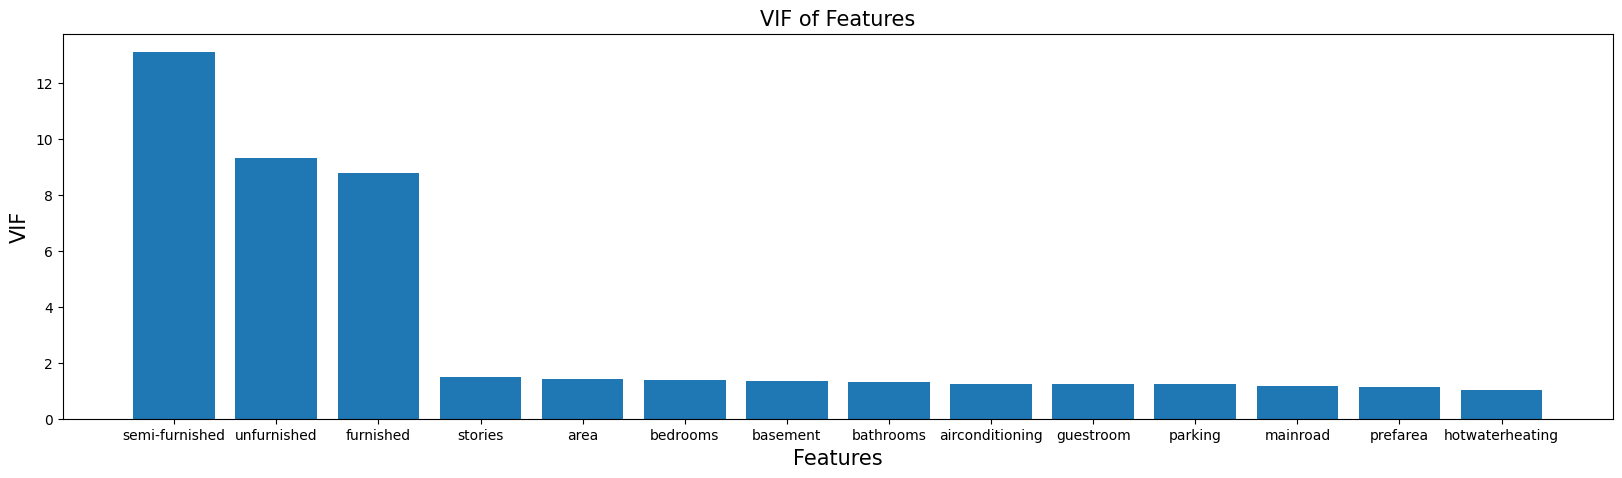

In [15]:
# prompt: plot vif on a bar graph

import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i])

plt.figure(figsize=(20, 5))
plt.bar(vif['Features'], vif['VIF'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('VIF', fontsize=15)
plt.title('VIF of Features', fontsize=15)

plt.show()


In [16]:
#solving multicollinearity issue
X=X.drop(["furnished","semi-furnished","unfurnished"],axis=1)

In [17]:
X_train,X_test,Train_Y,Test_Y = train_test_split(X,y,train_size=0.85, test_size=0.15, random_state=100)

In [18]:
#scaler = MinMaxScaler()
#standard scaler works better
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
Train_X_std = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.fit_transform(X_test)
Test_X_std = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Train_X_std=X_train
#Test_X_std=X_test

In [19]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
hp_train, hp_test = clf.fit(Train_X_std, Test_X_std, Train_Y, Test_Y)

100%|██████████| 42/42 [00:02<00:00, 15.11it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 453, number of used features: 11
[LightGBM] [Info] Start training from score 4723244.900662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [20]:
hp_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.70,0.75,940655.83,0.22
HistGradientBoostingRegressor,0.68,0.72,982108.76,0.22
ExtraTreesRegressor,0.67,0.71,1000808.00,0.24
PoissonRegressor,0.66,0.71,1001325.94,0.02
BaggingRegressor,0.66,0.71,1001592.10,0.06
LassoCV,0.66,0.71,1003716.80,0.06
Lasso,0.66,0.71,1003908.81,0.01
LassoLars,0.66,0.71,1003908.81,0.01
LarsCV,0.66,0.71,1003909.01,0.06


[(0.0, 1.0)]

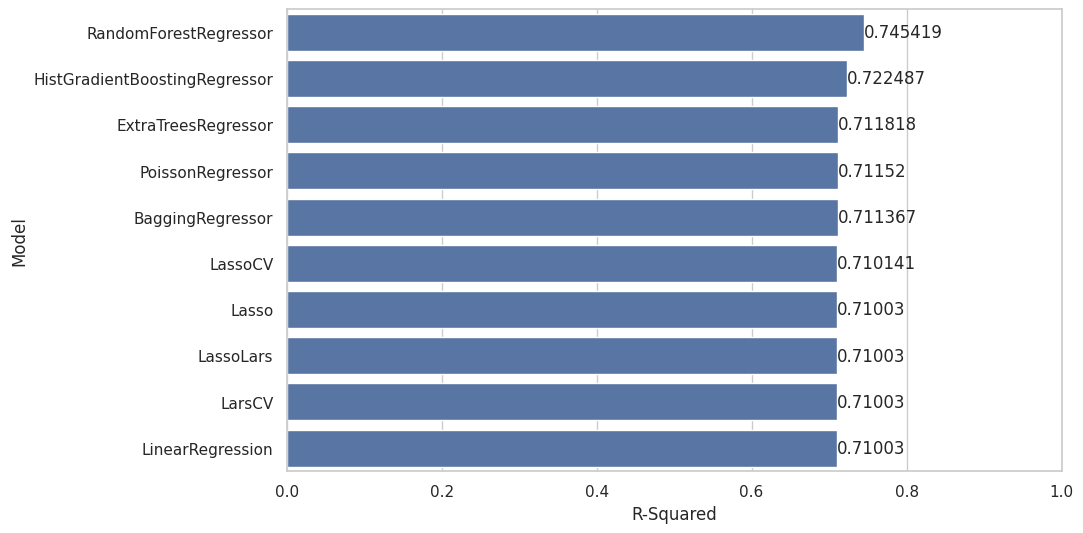

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

top10_models=hp_test.head(10)

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=top10_models.index, x="R-Squared", data=top10_models)
ax.bar_label(ax.containers[0])
ax.set(xlim=(0, 1))

[Text(0, 0, '940656'),
 Text(0, 0, '982109'),
 Text(0, 0, '1.00081e+06'),
 Text(0, 0, '1.00133e+06'),
 Text(0, 0, '1.00159e+06'),
 Text(0, 0, '1.00372e+06'),
 Text(0, 0, '1.00391e+06'),
 Text(0, 0, '1.00391e+06'),
 Text(0, 0, '1.00391e+06'),
 Text(0, 0, '1.00391e+06')]

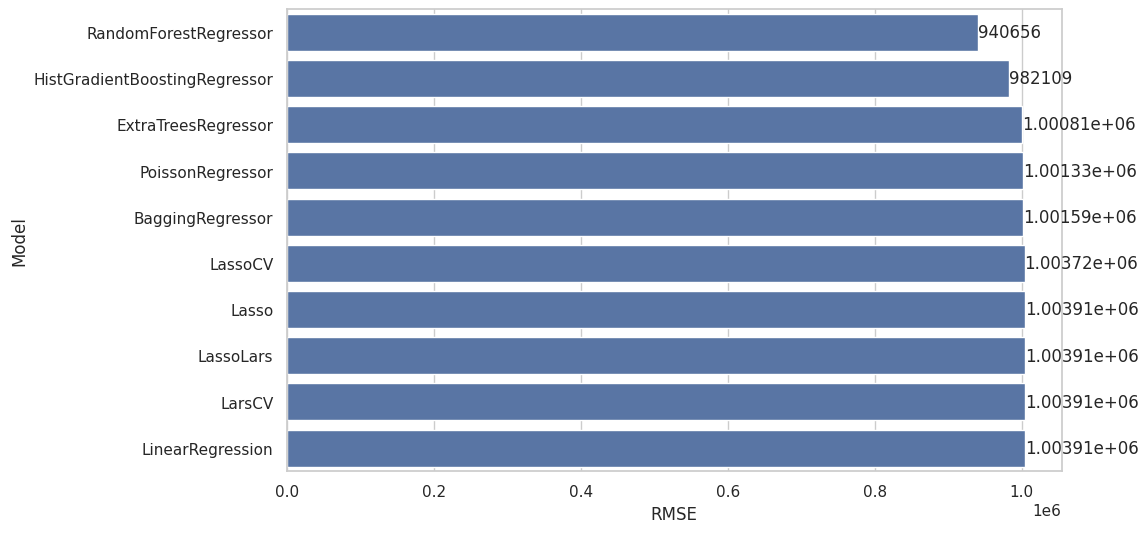

In [24]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=top10_models.index, x="RMSE", data=top10_models)
ax.bar_label(ax.containers[0])


[Text(0, 0, '0.222587'),
 Text(0, 0, '0.217844'),
 Text(0, 0, '0.238792'),
 Text(0, 0, '0.0216701'),
 Text(0, 0, '0.0554242'),
 Text(0, 0, '0.0580904'),
 Text(0, 0, '0.0138819'),
 Text(0, 0, '0.0101275'),
 Text(0, 0, '0.0643911'),
 Text(0, 0, '0.00960827')]

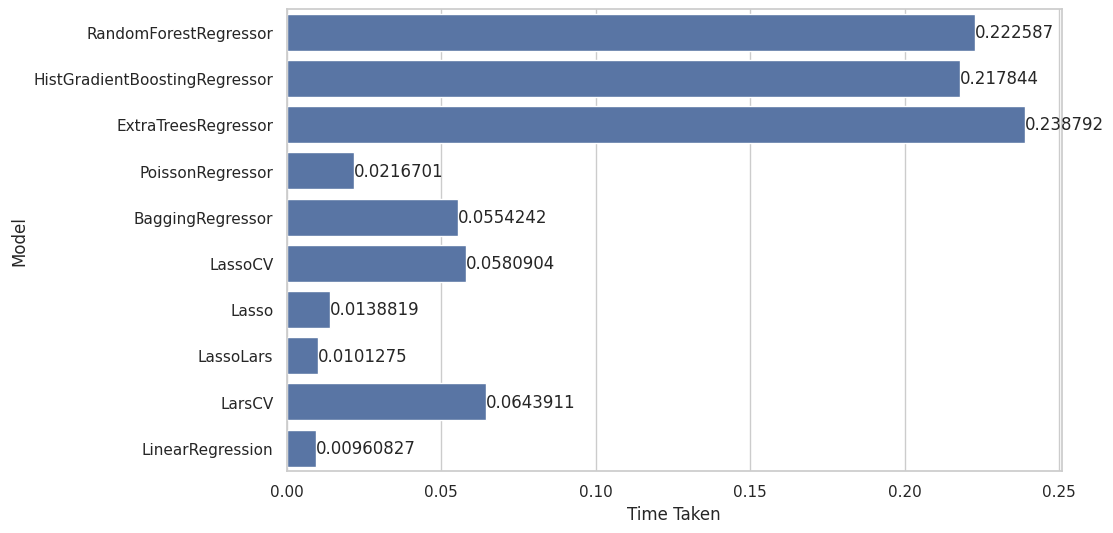

In [25]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=top10_models.index, x="Time Taken", data=top10_models)
ax.bar_label(ax.containers[0])